In [1]:
import pandas as pd

In [123]:
df = pd.read_csv("atp_matches_2023.csv")
df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2023-9900,United Cup,Hard,18,A,20230102,300,126203,3.0,NaN,...,62.0,47.0,15.0,12.0,9.0,9.0,9.0,3355.0,16.0,2375.0
1,2023-9900,United Cup,Hard,18,A,20230102,299,126207,NaN,NaN,...,12.0,8.0,3.0,4.0,1.0,3.0,19.0,2000.0,23.0,1865.0
2,2023-9900,United Cup,Hard,18,A,20230102,296,126203,3.0,NaN,...,62.0,51.0,7.0,12.0,2.0,2.0,9.0,3355.0,10.0,2905.0
3,2023-9900,United Cup,Hard,18,A,20230102,295,126207,NaN,NaN,...,41.0,26.0,12.0,9.0,6.0,9.0,19.0,2000.0,245.0,220.0
4,2023-9900,United Cup,Hard,18,A,20230102,292,126774,1.0,NaN,...,58.0,48.0,18.0,16.0,1.0,2.0,4.0,5550.0,16.0,2375.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981,2023-M-DC-2023-WG2-PO-RSA-LUX-01,Davis Cup WG2 PO: RSA vs LUX,NaN,4,D,20230204,5,202335,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1717.0,1.0
2982,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,NaN,4,D,20230203,1,117365,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,990.0,11.0,279.0,190.0
2983,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,NaN,4,D,20230203,2,121411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,364.0,131.0,894.0,15.0
2984,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,NaN,4,D,20230203,4,144949,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,894.0,15.0,285.0,184.0


In [124]:
top_20_players = ['Jannik Sinner', 'Alexander Zverev', 'Carlos Alcaraz', 'Taylor Fritz', 'Novak Djokovic', 'Casper Ruud',
                  'Jack Draper', 'Stefanos Tsitsipas', 'Andrey Rublev', 'Alex De Minaur', 'Daniil Medvedev', 'Holger Rune', 
                  'Tommy Paul', 'Ben Shelton', 'Arthur Fils', 'Lorenzo Musetti', 'Frances Tiafoe', 'Grigor Dimitrov', 
                  'Felix Auger Aliassime', 'Ugo Humbert']

# Create two new dataframes - one for wins, one for losses
wins_df = df[df['winner_name'].isin(top_20_players)].copy()
losses_df = df[df['loser_name'].isin(top_20_players)].copy()

# For wins, calculate various stats using winner and loser columns
wins_df['result'] = 1
wins_df['player'] = wins_df['winner_name']
wins_df['rate_1stWon'] = wins_df['w_1stWon'] / wins_df['w_1stIn']
wins_df['bpSaved_rate'] = wins_df['w_bpSaved'] / wins_df['w_bpFaced']
# Calculate return points won for winners (based on loser's service points)
wins_df['return_points_won'] = wins_df['l_svpt'] - wins_df['l_1stWon'] - wins_df['l_2ndWon']
wins_df['return_rate'] = wins_df['return_points_won'] / wins_df['l_svpt']

# For losses, calculate various stats using loser and winner columns
losses_df['result'] = 0
losses_df['player'] = losses_df['loser_name']
losses_df['rate_1stWon'] = losses_df['l_1stWon'] / losses_df['l_1stIn']
losses_df['bpSaved_rate'] = losses_df['l_bpSaved'] / losses_df['l_bpFaced']
# Calculate return points won for losers (based on winner's service points)
losses_df['return_points_won'] = losses_df['w_svpt'] - losses_df['w_1stWon'] - losses_df['w_2ndWon']
losses_df['return_rate'] = losses_df['return_points_won'] / losses_df['w_svpt']

# Combine the two dataframes
combined_df = pd.concat([wins_df, losses_df], ignore_index=True)

combined_df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,winner_rank,winner_rank_points,loser_rank,loser_rank_points,result,player,rate_1stWon,bpSaved_rate,return_points_won,return_rate
0,2023-9900,United Cup,Hard,18,A,20230102,300,126203,3.0,NaN,...,9.0,3355.0,16.0,2375.0,1,Taylor Fritz,0.865385,NaN,35.0,0.360825
1,2023-9900,United Cup,Hard,18,A,20230102,299,126207,NaN,NaN,...,19.0,2000.0,23.0,1865.0,1,Frances Tiafoe,0.789474,1.000000,10.0,0.476190
2,2023-9900,United Cup,Hard,18,A,20230102,296,126203,3.0,NaN,...,9.0,3355.0,10.0,2905.0,1,Taylor Fritz,0.880000,1.000000,24.0,0.292683
3,2023-9900,United Cup,Hard,18,A,20230102,295,126207,NaN,NaN,...,19.0,2000.0,245.0,220.0,1,Frances Tiafoe,0.837838,1.000000,30.0,0.441176
4,2023-9900,United Cup,Hard,18,A,20230102,292,126774,1.0,NaN,...,4.0,5550.0,16.0,2375.0,1,Stefanos Tsitsipas,0.826923,0.500000,23.0,0.258427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,2023-M-DC-2023-FLS-M-ITA-SRB-01,Davis Cup Finals SF: ITA vs SRB,Hard,2,D,20231125,2,206173,NaN,NaN,...,4.0,6490.0,1.0,11245.0,0,Novak Djokovic,0.760870,0.250000,40.0,0.380952
1297,2023-M-DC-2023-FLS-M-SRB-GBR-01,Davis Cup Finals QF: SRB vs GBR,Hard,2,D,20231123,1,200175,NaN,NaN,...,55.0,905.0,60.0,856.0,0,Jack Draper,0.781818,1.000000,16.0,0.216216
1298,2023-M-DC-2023-QLS-M-GER-SUI-01,Davis Cup QLS R1: GER vs SUI,Hard,4,D,20230203,4,144817,NaN,NaN,...,53.0,876.0,14.0,2425.0,0,Alexander Zverev,0.687500,0.333333,24.0,0.387097
1299,2023-M-DC-2023-WG1-M-DEN-BRA-01,Davis Cup WG1 R1: DEN vs BRA,Hard,4,D,20230915,1,106329,NaN,NaN,...,116.0,523.0,4.0,4710.0,0,Holger Rune,NaN,NaN,NaN,NaN


In [125]:
null_counts = combined_df[['return_rate', 'bpSaved_rate', 'rate_1stWon']].isnull().sum()
print("Count of null values in each column:")
print(null_counts)

Count of null values in each column:
return_rate      25
bpSaved_rate    115
rate_1stWon      25
dtype: int64


In [126]:
combined_df['return_rate'] = combined_df['return_rate'].fillna(0)
combined_df['bpSaved_rate'] = combined_df['bpSaved_rate'].fillna(0)
combined_df['rate_1stWon'] = combined_df['rate_1stWon'].fillna(0)
combined_df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,winner_rank,winner_rank_points,loser_rank,loser_rank_points,result,player,rate_1stWon,bpSaved_rate,return_points_won,return_rate
0,2023-9900,United Cup,Hard,18,A,20230102,300,126203,3.0,NaN,...,9.0,3355.0,16.0,2375.0,1,Taylor Fritz,0.865385,0.000000,35.0,0.360825
1,2023-9900,United Cup,Hard,18,A,20230102,299,126207,NaN,NaN,...,19.0,2000.0,23.0,1865.0,1,Frances Tiafoe,0.789474,1.000000,10.0,0.476190
2,2023-9900,United Cup,Hard,18,A,20230102,296,126203,3.0,NaN,...,9.0,3355.0,10.0,2905.0,1,Taylor Fritz,0.880000,1.000000,24.0,0.292683
3,2023-9900,United Cup,Hard,18,A,20230102,295,126207,NaN,NaN,...,19.0,2000.0,245.0,220.0,1,Frances Tiafoe,0.837838,1.000000,30.0,0.441176
4,2023-9900,United Cup,Hard,18,A,20230102,292,126774,1.0,NaN,...,4.0,5550.0,16.0,2375.0,1,Stefanos Tsitsipas,0.826923,0.500000,23.0,0.258427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,2023-M-DC-2023-FLS-M-ITA-SRB-01,Davis Cup Finals SF: ITA vs SRB,Hard,2,D,20231125,2,206173,NaN,NaN,...,4.0,6490.0,1.0,11245.0,0,Novak Djokovic,0.760870,0.250000,40.0,0.380952
1297,2023-M-DC-2023-FLS-M-SRB-GBR-01,Davis Cup Finals QF: SRB vs GBR,Hard,2,D,20231123,1,200175,NaN,NaN,...,55.0,905.0,60.0,856.0,0,Jack Draper,0.781818,1.000000,16.0,0.216216
1298,2023-M-DC-2023-QLS-M-GER-SUI-01,Davis Cup QLS R1: GER vs SUI,Hard,4,D,20230203,4,144817,NaN,NaN,...,53.0,876.0,14.0,2425.0,0,Alexander Zverev,0.687500,0.333333,24.0,0.387097
1299,2023-M-DC-2023-WG1-M-DEN-BRA-01,Davis Cup WG1 R1: DEN vs BRA,Hard,4,D,20230915,1,106329,NaN,NaN,...,116.0,523.0,4.0,4710.0,0,Holger Rune,0.000000,0.000000,NaN,0.000000


In [127]:
df = combined_df


In [128]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [129]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [130]:
%%R

require('tidyverse')
require('DescTools')

In [131]:
%%R -i df
logistic <- glm(result ~ rate_1stWon + bpSaved_rate + winner_age + loser_age + w_ace + l_ace  + w_df + l_df, data=df, family="binomial")
summary(logistic)


Call:
glm(formula = result ~ rate_1stWon + bpSaved_rate + winner_age + 
    loser_age + w_ace + l_ace + w_df + l_df, family = "binomial", 
    data = df)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -16.34350    1.22105 -13.385  < 2e-16 ***
rate_1stWon   18.70526    1.26010  14.844  < 2e-16 ***
bpSaved_rate   1.83352    0.29010   6.320 2.61e-10 ***
winner_age    -0.07498    0.01752  -4.280 1.87e-05 ***
loser_age      0.18987    0.02177   8.720  < 2e-16 ***
w_ace         -0.02305    0.01795  -1.284   0.1992    
l_ace         -0.12781    0.01825  -7.002 2.53e-12 ***
w_df           0.05937    0.03566   1.665   0.0959 .  
l_df           0.01483    0.03077   0.482   0.6297    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1609.7  on 1275  degrees of freedom
Residual deviance: 1050.6  on 1267  degrees of freedom
  (25 observations deleted due to missingnes

In [132]:
%%R 

PseudoR2(logistic, which="McFadden")

 McFadden 
0.3473343 



	Welch Two Sample t-test

data:  rate_1stWon by result
t = -11.557, df = 835.67, p-value < 2.2e-16
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -0.10242742 -0.07268681
sample estimates:
mean in group 0 mean in group 1 
      0.6803787       0.7679358 



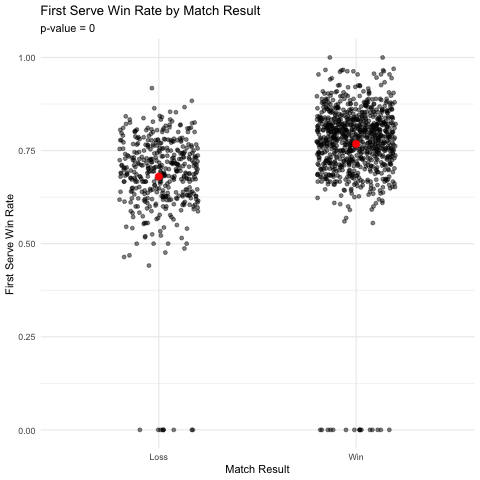

In [133]:
%%R

t_result <- t.test(rate_1stWon ~ result, data = df)
print(t_result)

# Simple dot plot
ggplot(df, aes(x = factor(result, labels = c("Loss", "Win")), y = rate_1stWon)) +
  geom_jitter(width = 0.2, alpha = 0.5) +
  stat_summary(fun = mean, geom = "point", size = 3, color = "red") +
  labs(title = "First Serve Win Rate by Match Result",
       subtitle = paste("p-value =", round(t_result$p.value, 4)),
       x = "Match Result",
       y = "First Serve Win Rate") +
  theme_minimal()

### Okay this all sounds good im gonna try to include rate of bp_Saved in my initial df too, keeping my earlier analysis intact in case something goes wrong with the one below

In [116]:
top_20_players = ['Jannik Sinner', 'Alexander Zverev', 'Carlos Alcaraz', 'Taylor Fritz', 'Novak Djokovic', 'Casper Ruud',
                  'Jack Draper', 'Stefanos Tsitsipas', 'Andrey Rublev', 'Alex De Minaur', 'Daniil Medvedev', 'Holger Rune', 
                  'Tommy Paul', 'Ben Shelton', 'Arthur Fils', 'Lorenzo Musetti', 'Frances Tiafoe', 'Grigor Dimitrov', 
                  'Felix Auger Aliassime', 'Ugo Humbert']

# Create two new dataframes - one for wins, one for losses
wins_df = df[df['winner_name'].isin(top_20_players)].copy()
losses_df = df[df['loser_name'].isin(top_20_players)].copy()

# For wins, calculate various stats using winner and loser columns
wins_df['result'] = 1
wins_df['player'] = wins_df['winner_name']
wins_df['rate_1stWon'] = wins_df['w_1stWon'] / wins_df['w_1stIn']
wins_df['bpSaved_rate'] = wins_df['w_bpSaved'] / wins_df['w_bpFaced']

# Add the break point statistics for winners
wins_df['bp_faced'] = wins_df['w_bpFaced']
wins_df['bp_saved'] = wins_df['w_bpSaved']
wins_df['bp_faced_against'] = wins_df['l_bpFaced']
wins_df['bp_saved_against'] = wins_df['l_bpSaved']
wins_df['bp_converted'] = wins_df['l_bpFaced'] - wins_df['l_bpSaved']
wins_df['bp_conversion_rate'] = wins_df['bp_converted'] / wins_df['l_bpFaced']

# Calculate return points won for winners (based on loser's service points)
wins_df['return_points_won'] = wins_df['l_svpt'] - wins_df['l_1stWon'] - wins_df['l_2ndWon']
wins_df['return_rate'] = wins_df['return_points_won'] / wins_df['l_svpt']

# For losses, calculate various stats using loser and winner columns
losses_df['result'] = 0
losses_df['player'] = losses_df['loser_name']
losses_df['rate_1stWon'] = losses_df['l_1stWon'] / losses_df['l_1stIn']
losses_df['bpSaved_rate'] = losses_df['l_bpSaved'] / losses_df['l_bpFaced']

# Add the break point statistics for losers
losses_df['bp_faced'] = losses_df['l_bpFaced']
losses_df['bp_saved'] = losses_df['l_bpSaved']
losses_df['bp_faced_against'] = losses_df['w_bpFaced']
losses_df['bp_saved_against'] = losses_df['w_bpSaved']
losses_df['bp_converted'] = losses_df['w_bpFaced'] - losses_df['w_bpSaved']
losses_df['bp_conversion_rate'] = losses_df['bp_converted'] / losses_df['w_bpFaced']

# Calculate return points won for losers (based on winner's service points)
losses_df['return_points_won'] = losses_df['w_svpt'] - losses_df['w_1stWon'] - losses_df['w_2ndWon']
losses_df['return_rate'] = losses_df['return_points_won'] / losses_df['w_svpt']

# Combine the two dataframes
combined_df = pd.concat([wins_df, losses_df], ignore_index=True)

# Handle any potential division by zero
columns_to_fix = ['rate_1stWon', 'bpSaved_rate', 'return_rate', 'bp_conversion_rate']
for col in columns_to_fix:
    combined_df[col] = combined_df[col].fillna(0)

combined_df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,rate_1stWon,bpSaved_rate,bp_faced,bp_saved,bp_faced_against,bp_saved_against,bp_converted,bp_conversion_rate,return_points_won,return_rate
0,2023-9900,United Cup,Hard,18,A,20230102,300,126203,3.0,NaN,...,0.865385,0.000000,0.0,0.0,9.0,9.0,0.0,0.000000,35.0,0.360825
1,2023-9900,United Cup,Hard,18,A,20230102,299,126207,NaN,NaN,...,0.789474,1.000000,3.0,3.0,3.0,1.0,2.0,0.666667,10.0,0.476190
2,2023-9900,United Cup,Hard,18,A,20230102,296,126203,3.0,NaN,...,0.880000,1.000000,4.0,4.0,2.0,2.0,0.0,0.000000,24.0,0.292683
3,2023-9900,United Cup,Hard,18,A,20230102,295,126207,NaN,NaN,...,0.837838,1.000000,5.0,5.0,9.0,6.0,3.0,0.333333,30.0,0.441176
4,2023-9900,United Cup,Hard,18,A,20230102,292,126774,1.0,NaN,...,0.826923,0.500000,2.0,1.0,2.0,1.0,1.0,0.500000,23.0,0.258427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,2023-M-DC-2023-FLS-M-ITA-SRB-01,Davis Cup Finals SF: ITA vs SRB,Hard,2,D,20231125,2,206173,NaN,NaN,...,0.760870,0.250000,4.0,1.0,9.0,7.0,2.0,0.222222,40.0,0.380952
1297,2023-M-DC-2023-FLS-M-SRB-GBR-01,Davis Cup Finals QF: SRB vs GBR,Hard,2,D,20231123,1,200175,NaN,NaN,...,0.781818,1.000000,4.0,4.0,0.0,0.0,0.0,0.000000,16.0,0.216216
1298,2023-M-DC-2023-QLS-M-GER-SUI-01,Davis Cup QLS R1: GER vs SUI,Hard,4,D,20230203,4,144817,NaN,NaN,...,0.687500,0.333333,6.0,2.0,3.0,1.0,2.0,0.666667,24.0,0.387097
1299,2023-M-DC-2023-WG1-M-DEN-BRA-01,Davis Cup WG1 R1: DEN vs BRA,Hard,4,D,20230915,1,106329,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000
